In [1]:
# import nltk
import nltk

In [2]:
# download stop words from nltk
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [7]:
# load the data set messages
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [8]:
# check how many messages we have in the data set
len(messages)

5574

In [9]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [11]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [17]:
# importing pandas
import pandas as pd

In [15]:
# loading messages to a data frame
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t', names=['Label', 'Message'])

In [21]:
# check out data frame
messages.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# check the description
messages.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [26]:
# check the most frequent messages
messages.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [33]:
# create a message length variable
messages['Length'] = messages['Message'].apply(lambda x: len(x))

In [35]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
# import the viz packages
import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
%matplotlib inline

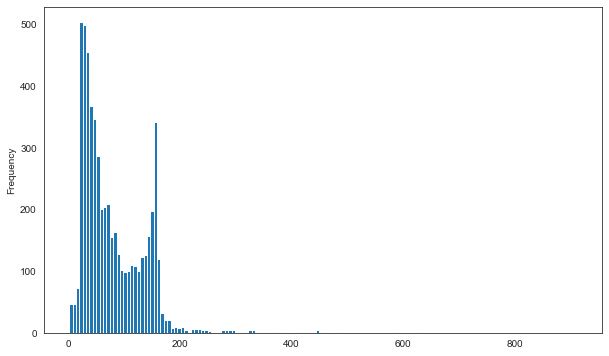

In [48]:
plt.figure(figsize=(10, 6))
messages['Length'].plot.hist(bins = 150)

In [49]:
# statistics of the Length
messages['Length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [56]:
messages[messages['Length'] == 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a266f50>,
      dtype=object)

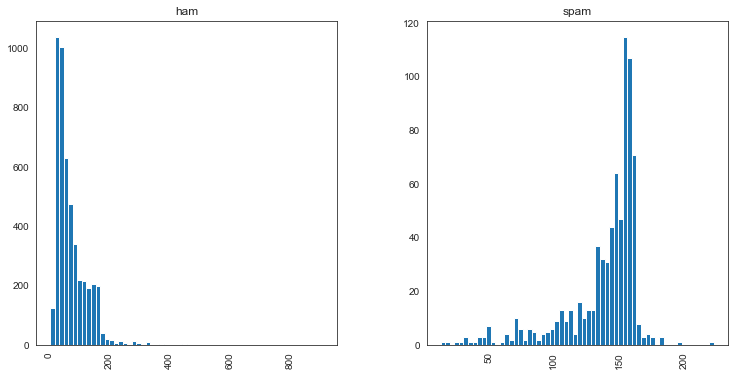

In [59]:
# check the length distribution by Label
messages.hist(column='Length', by= 'Label', bins= 60, figsize=(12,6))

In [60]:
# import the string package to remove the punctuation
import string

In [61]:
mess = 'O meu nome é João Manso, e tenho 25 anos!'

In [62]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
# removing the punctuation
nopunct = [c for c in mess if c not in string.punctuation]

In [70]:
# putting the elements all together
nopunct = ''.join(nopunct)

In [71]:
nopunct

'O meu nome é João Manso e tenho 25 anos'

In [66]:
# import the stop words from nltk
from nltk.corpus import stopwords

In [72]:
# check the stop words 
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [81]:
# remove the stop words from the message
mess_clean = [word for word in nopunct.split() if word.lower() not in stopwords.words('portuguese')]

In [83]:
# building a function that will remove the punctuation and stop words ate once

def text_process(mess):
    
    no_punctuation = [char for char in mess if char not in string.punctuation]
    
    no_punct = ''.join(no_punctuation)
    return [word for word in no_punct.split() if word not in stopwords.words('english')]

In [88]:
# tokanize the messages
messages['Message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: Message, dtype: object

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
# apply the tokanization
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['Message'])

In [92]:
# print how many words we have
print(len(bow_transformer.vocabulary_))

11617


In [101]:
mess_4 = messages['Message'][3]
mess_4

'U dun say so early hor... U c already then say...'

In [112]:
bow_4 = bow_transformer.transform([mess_4])

In [100]:
bow_transformer.get_feature_names()[9746]

'say'

In [102]:
messages_bow = bow_transformer.transform(messages['Message'])

In [105]:
print('Shape of the sparse matrix: ', messages_bow.shape)

Shape of the sparse matrix:  (5572, 11617)


In [108]:
# check the sparsity of the matrix
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity, 2)))

sparsity: 0.09


In [109]:
from sklearn.feature_extraction.text import TfidfTransformer

In [110]:
tfidf_transf = TfidfTransformer().fit(messages_bow)

In [114]:
tfidf4 = tfidf_transf.transform(bow_4)

In [116]:
print(tfidf4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [117]:
messages_tfidf = tfidf_transf.transform(messages_bow)

In [120]:
from sklearn.naive_bayes import MultinomialNB

In [121]:
# use a Naive Bayes algorithm
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['Label'])

In [123]:
# predict the 4th element
spam_detect_model.predict(tfidf4)[0]

'ham'

In [124]:
# check if we got it correct - we got!
messages['Label'][3]

'ham'

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['Message'], messages['Label'], test_size = 0.3)

In [129]:
# import sklearn pipeline to to all the transformation for us
from sklearn.pipeline import Pipeline

In [130]:
# create the pipeline with all the transformations
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [131]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x1a2c4cf830>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [132]:
predictions = pipeline.predict(msg_test)

In [133]:
# classification report
from sklearn.metrics import confusion_matrix, classification_report

In [135]:
print(classification_report(label_test, predictions))
print('\n')
print(confusion_matrix(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1452
        spam       1.00      0.74      0.85       220

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.97      0.96      1672



[[1452    0]
 [  58  162]]
